[사전 실행 지시사항]

모든 문제를 풀기 전에 아래 코드를 실행해주세요.

In [27]:
# 데이터 분석 및 시각화에 필요한 기본 라이브러리를 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

[문제 1]

seaborn은 Matplotlib를 기반으로 더 다채롭고 통계적인 그래프를 쉽게 그릴 수 있도록 도와주는 시각화 라이브러리입니다. seaborn 라이브러리를 별칭 sns로 임포트하는 코드를 작성하시오.

In [28]:
import seaborn as sns

[문제 2]

AI 모델링을 위해 분석할 데이터를 준비하려고 합니다. 아래 가이드에 따라 코드를 작성하세요.
- Pandas 의 read_csv 함수를 사용하여 1_used_car_prices.csv 파일을 읽어 데이터프레임 변수 car_df에 할당하세요.
- 불러온 cas_df의 info()를 통해 확인하고, 결측치가 32개 존재하는 변수가 무엇인지 '답안01'에 작성하세요. (답안01 = brand)

In [29]:
car_df = pd.read_csv("data/1_used_car_prices.csv")
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                961 non-null    object 
 1   age_years            1000 non-null   float64
 2   mileage_km           1000 non-null   float64
 3   engine_type          979 non-null    object 
 4   engine_size_cc       1000 non-null   float64
 5   horsepower           1000 non-null   float64
 6   fuel_efficiency_kml  1000 non-null   float64
 7   accident_count       1000 non-null   float64
 8   color                968 non-null    object 
 9   option_grade         973 non-null    object 
 10  price_krw            1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [30]:
# 답안01 = color

[문제03] engine_type별로 차량 가격에 차이가 있는지 확인하려고 합니다. seaborn의 barplot을 사용하여 engine_type에 따른 price_krw의 평균을 시각화하세요.

In [31]:
import platform
from matplotlib import rc
if platform.system() == 'Darwin': # masOS
    rc('font', family='AppleGothic')
else:
    rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

<Axes: xlabel='engine_type', ylabel='price_krw'>

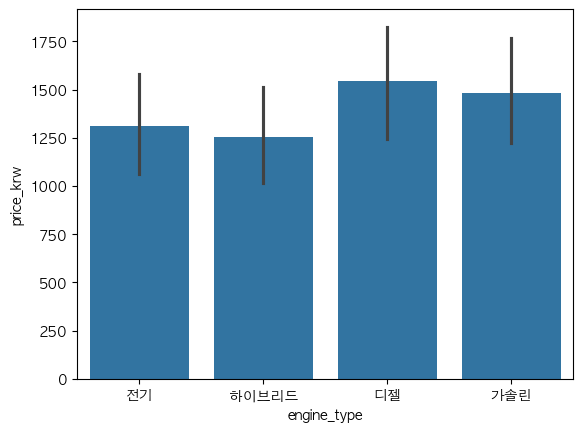

In [32]:
sns.barplot(data=car_df, x='engine_type', y='price_krw')
#답안04 = 디젤 

[문제04]

brand와 option_grade를 조합했을 때의 평균가격을 확인하고자 합니다. groupby()를 사용하여 데이터를 brand와 option_grade를 그룹화하고, price_krw의 평균을 계산하세요. 계산된 결과에서 가장 평균 가격이 높은 조합의 brand와 option_grade를 답안 04 변수에 문자열로 저장하세요.

In [33]:
grouped_price = car_df.groupby(['brand','option_grade'])['price_krw'].mean()
grouped_price

brand  option_grade
A사     고급              1261.629630
       기본              1188.489583
       중급              1314.852632
B사     고급              1539.666667
       기본              1503.191489
       중급              1877.250000
C사     고급              1165.759259
       기본              1924.813559
       중급              1316.819672
D사     고급              1467.735849
       기본              1218.375000
       중급              1019.464286
Name: price_krw, dtype: float64

In [34]:
highest_price_combo = grouped_price.idxmax()
print(highest_price_combo)

('C사', '기본')


In [35]:
답안04 = ('C사', '기본')

[문제05]

모델링 성능을 높이기 위해 데이터를 정제하려고 합니다. option_grade컬럼의 결측치(NaN)를 해당 컬럼에서 가장 자주 나타나는값(최빈값)으로 채우고, 분석에 사용하지 않을 color컬럼을 삭제하는 코드를 작성하세요. 전처리된 데이터프레임은 car_pre 변수에 저장하세요

In [36]:
car_df.head()

,brand,age_years,mileage_km,engine_type,engine_size_cc,horsepower,fuel_efficiency_kml,accident_count,color,option_grade,price_krw
0,B사,14.0,218413.0,전기,3253.0,333.0,8.6,3.0,검정,고급,100.0
1,D사,11.0,90552.0,하이브리드,3294.0,327.0,8.3,0.0,은색,고급,100.0
2,C사,13.0,178150.0,디젤,3805.0,387.0,4.8,0.0,흰색,중급,100.0
3,NaN,7.0,127044.0,하이브리드,1146.0,110.0,19.2,2.0,기타,고급,100.0
4,A사,2.0,40116.0,디젤,3165.0,340.0,8.9,0.0,은색,고급,3987.0


In [37]:
# 원본 보존을 위해 데이터프레임 복사
car_pre = car_df.copy()
# 1. option_grade 의 컬럼의 최빈값을 구함
mode_option = car_df['option_grade'].mode()[0]
# 2. fillna를 사용하여 결측치를 최빈값으로 채운다
car_pre['option_grade'].fillna(mode_option, inplace=True)
# 3. drop으로 color 컬럼을 삭자한다.
car_pre.drop(['color'], axis=1, inplace=True)

/var/folders/kn/2bm1tvkx58qgg76b0m41c68c0000gn/T/ipykernel_11918/3362940176.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_pre['option_grade'].fillna(mode_option, inplace=True)


In [38]:
car_pre.head()

,brand,age_years,mileage_km,engine_type,engine_size_cc,horsepower,fuel_efficiency_kml,accident_count,option_grade,price_krw
0,B사,14.0,218413.0,전기,3253.0,333.0,8.6,3.0,고급,100.0
1,D사,11.0,90552.0,하이브리드,3294.0,327.0,8.3,0.0,고급,100.0
2,C사,13.0,178150.0,디젤,3805.0,387.0,4.8,0.0,중급,100.0
3,NaN,7.0,127044.0,하이브리드,1146.0,110.0,19.2,2.0,고급,100.0
4,A사,2.0,40116.0,디젤,3165.0,340.0,8.9,0.0,고급,3987.0


In [39]:
car_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                961 non-null    object 
 1   age_years            1000 non-null   float64
 2   mileage_km           1000 non-null   float64
 3   engine_type          979 non-null    object 
 4   engine_size_cc       1000 non-null   float64
 5   horsepower           1000 non-null   float64
 6   fuel_efficiency_kml  1000 non-null   float64
 7   accident_count       1000 non-null   float64
 8   option_grade         1000 non-null   object 
 9   price_krw            1000 non-null   float64
dtypes: float64(7), object(3)
memory usage: 78.2+ KB


[문제06]

머신러닝 모델은 문자열 데이터를 이해할 수 없으므로, 범주형 데이터를 숫자형으로 변환해야 합니다. pandas의 get_dummies() 함수를 사용하여 아래의 범주형 컬럼들을 원핫인코딩으로 변환하세요

- 대상 컬럼 : brand, engine_type, option_grade
- brand컬럼의 결측치는 get_dummies 처리 전에 'unknown'이라는 문자열로 채워주세요.
- 변환이 적용된 데이터프레임은 car_numeric 변수에 저장하세요

In [40]:
# brand컬럼의 결측치를 먼저 unknown으로 채우기
car_pre['brand'].fillna('unknown', inplace=True)
# get_dummies() 로 변환
categorical_cols = ['brand','engine_type','option_grade']
car_numeric = pd.get_dummies(car_pre, columns=categorical_cols)
car_numeric


/var/folders/kn/2bm1tvkx58qgg76b0m41c68c0000gn/T/ipykernel_11918/3590657206.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_pre['brand'].fillna('unknown', inplace=True)


,age_years,mileage_km,engine_size_cc,horsepower,fuel_efficiency_kml,accident_count,price_krw,brand_A사,brand_B사,brand_C사,brand_D사,brand_unknown,engine_type_가솔린,engine_type_디젤,engine_type_전기,engine_type_하이브리드,option_grade_고급,option_grade_기본,option_grade_중급
0,14.0,218413.0,3253.0,333.0,8.6,3.0,100.0,False,True,False,False,False,False,False,True,False,True,False,False
1,11.0,90552.0,3294.0,327.0,8.3,0.0,100.0,False,False,False,True,False,False,False,False,True,True,False,False
2,13.0,178150.0,3805.0,387.0,4.8,0.0,100.0,False,False,True,False,False,False,True,False,False,False,False,True
3,7.0,127044.0,1146.0,110.0,19.2,2.0,100.0,False,False,False,False,True,False,False,False,True,True,False,False
4,2.0,40116.0,3165.0,340.0,8.9,0.0,3987.0,True,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10.0,202059.0,3397.0,334.0,5.3,0.0,100.0,True,False,False,False,False,False,False,True,False,False,True,False
996,12.0,186219.0,2975.0,296.0,9.8,0.0,100.0,False,False,False,True,False,False,False,False,True,False,False,True
997,14.0,270304.0,2657.0,282.0,12.5,1.0,100.0,True,False,False,False,False,False,True,False,False,True,False,False
998,11.0,106943.0,3541.0,360.0,7.4,4.0,100.0,False,False,False,True,False,False,False,False,False,False,True,False


[문제07]

데이터의 수치형 특성(Feature)들 간의 선형적 관계를 확인하고자 합니다. 아래 가이드에 따라 seaborn의 heatmap을 생성하고, 출력 결과에 대한 답안을 작성하세요.

- 대상컬럼 : age_years, mileage_km, engine_size_cc, horsepower, fuel_efficiency_kml, price_krw

- Heatmap 옵션 : 상관계수 값을 각 셀에 표시 (annot=True), 색상맵은 viridis 사용.

- 출력 결과에 대한 해석으로 옳은 선택지를 답안03 변수에 저장하세요.


1. price_krw 과 가장 강한 음의 상관관계를 갖는 특성은 horsepower이다.
2. age_years와 mileage_km는 서로 강한 음의 상관관계를 보인다. 
3. fuel_efficiency_kml는 price_krw는 상관관계가 거의 없다고 봐도 무방하다.
4. engine_size_cc와 horsepower은 다중공산성을 의심하지 않아도 된다. 

In [41]:
q7_df = car_pre[['age_years','mileage_km','engine_size_cc','horsepower','fuel_efficiency_kml','price_krw']]
q7_df

,age_years,mileage_km,engine_size_cc,horsepower,fuel_efficiency_kml,price_krw
0,14.0,218413.0,3253.0,333.0,8.6,100.0
1,11.0,90552.0,3294.0,327.0,8.3,100.0
2,13.0,178150.0,3805.0,387.0,4.8,100.0
3,7.0,127044.0,1146.0,110.0,19.2,100.0
4,2.0,40116.0,3165.0,340.0,8.9,3987.0
...,...,...,...,...,...,...
995,10.0,202059.0,3397.0,334.0,5.3,100.0
996,12.0,186219.0,2975.0,296.0,9.8,100.0
997,14.0,270304.0,2657.0,282.0,12.5,100.0
998,11.0,106943.0,3541.0,360.0,7.4,100.0


In [42]:
heat = q7_df.corr()
heat

,age_years,mileage_km,engine_size_cc,horsepower,fuel_efficiency_kml,price_krw
age_years,1.000000,0.860690,-0.000132,-0.004879,0.009563,-0.771056
mileage_km,0.860690,1.000000,0.046481,0.033306,-0.035371,-0.723089
engine_size_cc,-0.000132,0.046481,1.000000,0.915242,-0.879957,0.105974
horsepower,-0.004879,0.033306,0.915242,1.000000,-0.915252,0.113091
fuel_efficiency_kml,0.009563,-0.035371,-0.879957,-0.915252,1.000000,-0.117015
price_krw,-0.771056,-0.723089,0.105974,0.113091,-0.117015,1.000000


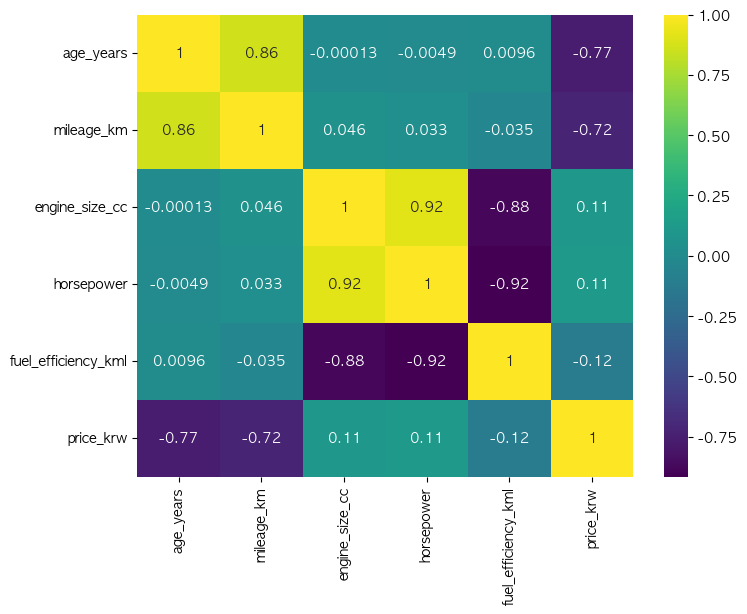

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='viridis')
plt.show()

In [44]:
답안03 = 3
# 다중공산성 : 독립변수 간 상관이 높아(|r|>0.8) 회귀분석 결과의 신뢰도를 떨어뜨림. 

[문제08]

훈련과 검증에 사용할 데이터셋을 분리하려고 합니다. price_krw 컬럼을 label y 로, 나머지 컬럼들을 feature X 로 할당한 후 훈련 데이터셋과 검증 데이터셋으로 분리하는 코드를 작성하세요.

- 대상 데이터셋 : car_numeric
- sklearn.model_selection의 train_test_split 함수 사용
- 훈련:검증 데이터비율 7:3
- random_state = 100
- 회귀 문제이므로 stratify 옵션은 사용하지 않습니다. 

In [45]:
from sklearn.model_selection import train_test_split

X = car_numeric.drop('price_krw', axis=1)
y = car_numeric['price_krw']
y

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=100)

print('X_train : ', X_train.shape)
print('X_valid : ', X_valid.shape)
print('y_train : ', y_train.shape)
print('y_valid : ', y_valid.shape)


X_train :  (700, 18)
X_valid :  (300, 18)
y_train :  (700,)
y_valid :  (300,)


[문제09]

수치형 데이터들의 단위(Scale)를 맞춰주기 위해 데이터 스케일링을 진행합니다. 모든 값을 0과 1 사이로 변환하는 MinMaxScaler를 사용하여 훈련데이터와 검증데이터의 Feature(X_train, X_valid)를 스케일링하는 코드를 작성하세요. 

- sklearn.preprocessing 의 MinMaxScaler 함수 사용
- 훈련 데이터에는 fit_transform()을, 검증 데이터에는 transform()을 적용하세요.
- 스케일링된 결과는 각각 X_train_scaled, X_valid,scaled 변수에 저장하세요.

In [46]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

X_train_scaled = ms.fit_transform(X_train)
X_valid_scaled = ms.transform(X_valid)

[문제10]

앙상블 모델 중 하나인 RandomForestRegressor를 사용하여 중고차 가격 예측 모델을 학습시키려고 합니다. 아래 가이드에 따라 모델을 생성하고 학습시키는 코드를 작성하세요.

- sklearn.ensemble 의 RandomForestRegressor 함수 사용
- 하이퍼파라미터 설정
    - n_estimators(결정트리개수):200
    - max_depth(트리의 최대깊이):10
    - random_state:100
- 모델객체는 model_rf 변수에 저장하고, 스케일링된 훈련 데이터로 학습시키세요.

In [47]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=100)
model_rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=100)

[문제11]

이번에는 XGBRegressor 모델을 사용하여 학습을 진행하고, 모델이 어떤 특성을 중요하게 생각하는지 확인하려고 합니다. 아래 가이드에 따라 모델을 학습시키고, 가장 중요한 특성의 이름을 답안 11변수에 저장하세요.

- xgboost의 XGBRegressor함수 사용(사전 실행 코드에서 xgb로 임포트)
- 하이퍼파라미터 설정
    - n_estimators:200
    - learning_rate:0.1
    - max_depth:5
    - random_state:100
- 모델 객체는 model_xgb변수에 저장하고 학습시키세요.
- 학습 후 feature_importances_ 속성을 확인하여 가장 중요한 특성의 컬럼명을 답안 11에 저장하세요.
(예. 답안11 = 'mileage_km')

In [48]:
model_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=100)

model_xgb.fit(X_train_scaled, y_train)

importances = model_xgb.feature_importances_
feature_names = X.columns

most_important_idx = np.argmax(importances)
most_important_feature = feature_names[most_important_idx]

answer = most_important_feature
answer

'mileage_km'

[문제12]
회귀 모델 성능 평가

앞서 학습한 두 머신러닝 모델(model_rf, model_xgb) 의 성능을 평가하려고 합니다. 회귀 모델의 성능을 평가하는 대표적인 지표인 MSE(Mean Squared Error) 와 R^2 Score(결정계수) 를 계산하는 코드를 작성하시오.

- sklearn.metrics에서 mean_squared_error, r2_score 함수를 import 하세요.
- 두 모델에 대해 각각 y_valid와 예측값을 사용하여 두 가지 평가지표를 모두 계산하고 출력하시오.

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

# RandomForesetRegressor 모델 성능 평가
rf_pred = model_rf.predict(X_valid_scaled)
rf_mse = mean_squared_error(rf_pred, y_valid)
rf_r2 = r2_score(rf_pred, y_valid)

# XGBRegressor 모델 성능 평가
xgb_pred = model_xgb.predict(X_valid_scaled)
xgb_mse = mean_squared_error(xgb_pred, y_valid)
xgb_r2 = r2_score(xgb_pred, y_valid)

# 성능 비교
print(f"RandomForestRegressor | MSE : {rf_mse:.4f}| r2_score : {rf_r2:.4f}")
print(f"XGBRegresseor         | MSE : {xgb_mse:.4f} | r2_score : {xgb_r2:.4f}")



RandomForestRegressor | MSE : 187724.8573| r2_score : 0.9513
XGBRegresseor         | MSE : 97917.2327 | r2_score : 0.9748


[문제13]  
이번에는 딥러닝을 사용하여 가격 예측 모델을 만들어 봅니다. 아래의 가이드와 토폴로지 그림에 따라 tensorflow.keras를 사용하여 회귀 모델을 구축하고 학습시키세요.

- Sequential 모델을 사용하세요.

### ● 모델 구조
- 입력층: Dense 레이어, 128개 노드, 활성화 함수 relu  
- 은닉층 1: Dense 레이어, 64개 노드, 활성화 함수 relu  
- 은닉층 2: Dense 레이어, 32개 노드, 활성화 함수 relu  
- 출력층: Dense 레이어, 1개 노드(가격을 예측하므로)

### ● 컴파일 설정
- optimizer: adam  
- loss: mean_squared_error(회귀 문제용 손실 함수)

### ● 학습 설정
- epochs: 50  
- batch_size: 32  
- validation_data로 X_valid_scaled, y_valid를 사용하여 검증 손실도 함께 확인하세요.  
- 학습 과정을 history 변수에 저장하세요.



In [58]:
# 아래의 코드를 실행해 주세요.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model_dl = Sequential([
    Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model_dl.compile(optimizer='adam', loss='mean_squared_error')

history = model_dl.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),
    verbose=0
)

print("딥러닝 모델 학습 완료")
model_dl.evaluate(X_valid_scaled, y_valid)

딥러닝 모델 학습 완료
10/10 [==============================] - 0s 517us/step - loss: 299077.7500


299077.75

Sequential 모델 없이 진행하기(pytorch)

In [72]:
import torch
import torch.nn as nn 
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

# ============================================
# 1단계: 데이터를 Numpy에서 PyTorch 텐서로 변환
# ============================================
# numpy 배열(숫자만 있는 표) -> torch 텐서(PyTorch가 이해하는 형식)로 변환
# dtype=torch.float32: 32비트 실수형으로 지정 (메모리 효율적)
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
# y값도 변환하되, .view(-1, 1)로 세로 벡터(열 벡터)로 변환
# -1은 "자동 계산"이라는 뜻 (행은 자동, 열은 1개)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_valid_torch = torch.tensor(X_valid_scaled, dtype=torch.float32)
y_valid_torch = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)

# ============================================
# 2단계: DataLoader 생성
# ============================================
# DataLoader: 데이터를 배치(작은 묶음)로 나누어서 한 번에 제공하는 역할
# 예: 1000개 데이터를 배치크기 32로 나누면 -> 32, 32, 32, ... 이런 식으로 제공

# 훈련 데이터용 DataLoader
train_dataset = TensorDataset(X_train_torch, y_train_torch)  # X, y 짝지음
train_dataloader = DataLoader(
    train_dataset, 
    batch_size=32,    # 한 번에 32개씩 처리
    shuffle=True      # 매 에폭마다 순서를 섞음 (학습 성능 향상)
)

# 검증 데이터용 DataLoader (섞지 않음)
valid_dataset = TensorDataset(X_valid_torch, y_valid_torch)
valid_dataloader = DataLoader(
    valid_dataset, 
    batch_size=64     # 검증은 큰 배치 사용 (계산 빠르게)
)

# ============================================
# 3단계: GPU/CPU 선택 (device 설정)
# ============================================
# GPU가 있으면 GPU 사용, 없으면 CPU 사용
# GPU는 병렬 계산이 빠르므로 딥러닝 속도가 훨씬 빠름
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"사용 디바이스: {device}")

사용 디바이스: cpu


In [77]:
# ============================================
# 4단계: 신경망 모델 클래스 정의
# ============================================
# PyTorch에서는 모델을 클래스로 만들고 forward() 메서드로 순전파 구현
class CarPriceRegressor(nn.Module):
    def __init__(self, input_dim):
        """
        생성자: 신경망의 구조를 정의
        input_dim: 입력 특성의 개수 (우리의 경우 약 70개)
        """
        super().__init__()  # 부모 클래스 초기화 (nn.Module의 초기화)
        
        # 각 레이어 정의
        # nn.Linear(입력크기, 출력크기)
        # 입력층: input_dim개의 특성 -> 128개의 노드
        self.fc1 = nn.Linear(input_dim, 128)  # fc = fully connected
        # 은닉층 1: 128개 -> 64개
        self.fc2 = nn.Linear(128, 64)
        # 은닉층 2: 64개 -> 32개
        self.fc3 = nn.Linear(64, 32)
        # 출력층: 32개 -> 1개 (차량 가격 1개 예측)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        """
        순전파 (Forward Propagation)
        데이터가 신경망을 통과하는 과정을 정의
        """
        # fc1을 통과 -> ReLU 활성화 함수 적용
        # ReLU: 음수는 0, 양수는 그대로 (비선형성 추가)
        x = torch.relu(self.fc1(x))
        # fc2 통과 -> ReLU
        x = torch.relu(self.fc2(x))
        # fc3 통과 -> ReLU
        x = torch.relu(self.fc3(x))
        # 출력층 통과 (활성화 함수 없음 - 회귀 문제이므로 선형)
        return self.out(x)

# ============================================
# 5단계: 모델, 손실함수, 옵티마이저 설정
# ============================================
# 모델 인스턴스 생성 및 device로 옮김
model = CarPriceRegressor(X_train_torch.shape[1]).to(device)
# .shape[1]: 첫 번째 축(행) 제외하고 두 번째 축(컬럼) 개수 = 특성 개수
# .to(device): 모델을 GPU/CPU로 옮김

# 손실함수: MSELoss (Mean Squared Error)
# 회귀 문제의 대표적인 손실함수
# 예측값과 실제값의 차이를 제곱한 평균
criterion = nn.MSELoss()

# 옵티마이저: Adam (Adaptive Moment Estimation)
# 모델의 가중치를 업데이트하는 알고리즘
# lr=0.001: 학습률 (얼마나 빠르게 가중치를 업데이트할지)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [78]:
# ============================================
# 6단계: 모델 학습 (Training Loop)
# ============================================
epochs = 50  # 훈련 데이터를 전체 50번 반복하면서 학습

for epoch in range(epochs):
    # ---- 훈련 모드 설정 ----
    model.train()  # 모델을 훈련 모드로 (Dropout, BatchNorm 등이 활성화)
    epoch_loss = 0  # 이 에폭의 누적 손실 (0으로 초기화)

    # ---- 배치 단위로 훈련 ----
    for batch_idx, samples in enumerate(train_dataloader):
        # train_dataloader에서 배치 하나씩 가져옴
        # samples = (xb, yb): X 배치, y 배치
        xb, yb = samples
        
        # 데이터를 GPU/CPU로 옮김
        xb, yb = xb.to(device), yb.to(device)

        # ---- 그래디언트(기울기) 초기화 ----
        # 이전 배치의 그래디언트를 지우지 않으면 누적됨
        optimizer.zero_grad()
        
        # ---- 순전파 (Forward Pass) ----
        # 모델에 입력 데이터 통과 -> 예측값 얻음
        pred = model(xb)
        
        # ---- 손실 계산 ----
        # 예측값과 실제값의 MSE 계산
        loss = criterion(pred, yb)
        
        # ---- 역전파 (Backward Pass) ----
        # 손실에 대한 각 가중치의 그래디언트 계산
        loss.backward()
        
        # ---- 가중치 업데이트 ----
        # 계산된 그래디언트에 따라 가중치 업데이트
        optimizer.step()

        # ---- 누적 손실 계산 ----
        # 배치 크기로 가중치를 부여하여 누적
        epoch_loss += loss.item() * xb.size(0)

    # ---- 에폭 평균 손실 계산 ----
    # 전체 훈련 데이터의 손실 평균
    epoch_loss /= len(train_dataloader.dataset)
    
    # ---- 학습 진행 상황 출력 ----
    print(f"Epoch {epoch+1}/{epochs}, Train Loss : {epoch_loss:.4f}")

Epoch 1/50, Train Loss : 5219737.8943
Epoch 2/50, Train Loss : 1379267.7086
Epoch 3/50, Train Loss : 514103.6238
Epoch 4/50, Train Loss : 279526.5760
Epoch 5/50, Train Loss : 245408.6861
Epoch 6/50, Train Loss : 216229.7204
Epoch 7/50, Train Loss : 272968.4669
Epoch 8/50, Train Loss : 210926.9050
Epoch 9/50, Train Loss : 229905.1015
Epoch 10/50, Train Loss : 211657.2567
Epoch 11/50, Train Loss : 179445.2984
Epoch 12/50, Train Loss : 197898.2204
Epoch 13/50, Train Loss : 237443.4019
Epoch 14/50, Train Loss : 229351.9950
Epoch 15/50, Train Loss : 227282.1639
Epoch 16/50, Train Loss : 156656.7826
Epoch 17/50, Train Loss : 178955.4188
Epoch 18/50, Train Loss : 199774.6938
Epoch 19/50, Train Loss : 185397.0710
Epoch 20/50, Train Loss : 155892.0746
Epoch 21/50, Train Loss : 151412.9454
Epoch 22/50, Train Loss : 142847.9114
Epoch 23/50, Train Loss : 137223.8650
Epoch 24/50, Train Loss : 134665.5916
Epoch 25/50, Train Loss : 133812.4408
Epoch 26/50, Train Loss : 195101.3944
Epoch 27/50, Train 

In [79]:
# ============================================
# 7단계: 모델 검증 (Validation)
# ============================================
# 검증: 학습된 모델이 새로운 데이터에 얼마나 잘 작동하는지 확인

# ---- 평가 모드 설정 ----
model.eval()  # 모델을 평가 모드로 (Dropout, BatchNorm 비활성화)
valid_loss = 0  # 검증 손실 누적값 (0으로 초기화)

# ---- 그래디언트 계산 안 함 (메모리 절약) ----
# 검증 중에는 가중치를 업데이트하지 않으므로 그래디언트 불필요
with torch.no_grad():
    # 검증 데이터로 배치 단위 평가
    for batch_idx, samples in enumerate(valid_dataloader):
        xb, yb = samples
        # 데이터를 GPU/CPU로 옮김
        xb, yb = xb.to(device), yb.to(device)

        # ---- 순전파만 수행 ----
        # (역전파는 하지 않음)
        pred = model(xb)
        
        # ---- 검증 손실 계산 ----
        valid_loss += criterion(pred, yb).item() * xb.size(0)

# ---- 검증 평균 손실 계산 ----
valid_loss /= len(valid_dataloader.dataset)

# ---- 검증 결과 출력 ----
print(f"Validation MSE : {valid_loss:.4f}")
# MSE가 작을수록 모델 성능이 좋음

Validation MSE : 354528.0583


## 14  
훈련으로 완성된 딥러닝 모델을 사용하여 다음과 같은 새로운 중고차 데이터를 입력했을 때의 가격을 예측하려고 합니다. 주어진 시뮬레이션 데이터를 문제 9번에서 생성한 스케일러(scaler)를 사용하여 변환한 뒤 딥러닝 모델에 입력하세요.

- 결과는 `predicted_price` 변수에 저장하세요.

### [사전 실험 지시사항]
아래 코드를 실행하여 시뮬레이션용 데이터를 생성하세요.

In [82]:
new_car_data = np.array([[5, 80000, 2000, 150, 12.0, 1.0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]])

In [83]:
new_car_scaled = ms.transform(new_car_data)
new_car_scaled

/opt/anaconda3/envs/myvenv/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.35714286, 0.27884354, 0.33355615, 0.2042042 , 0.47311828,
        0.25      , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [84]:
predicted_price = model_dl.predict(new_car_scaled)
print(f"새로운 중고차의 예측 가격 : {predicted_price[0][0]:.2f} 만원")

1/1 [==============================] - 0s 55ms/step
새로운 중고차의 예측 가격 : 272.24 만원
